In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
# Directory containing audio files
audio_directory = r'C:\Users\alina\Desktop\Capstone Project\segmented_audio'
audio_files = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith('.wav')]

# Load the saved features
features_scaled = np.load(r'C:\Users\alina\Desktop\characterizing-soundscapes\cluster_data\features_scaled.npy')
print("Loaded features with shape:", features_scaled.shape)

Loaded features with shape: (86335, 13)


In [ ]:
selected_features = features_scaled[:,[0,1,2,3]]
pca = PCA(n_components=2)
features_2d = pca.fit_transform(selected_features)

<Figure size 1500x1500 with 0 Axes>

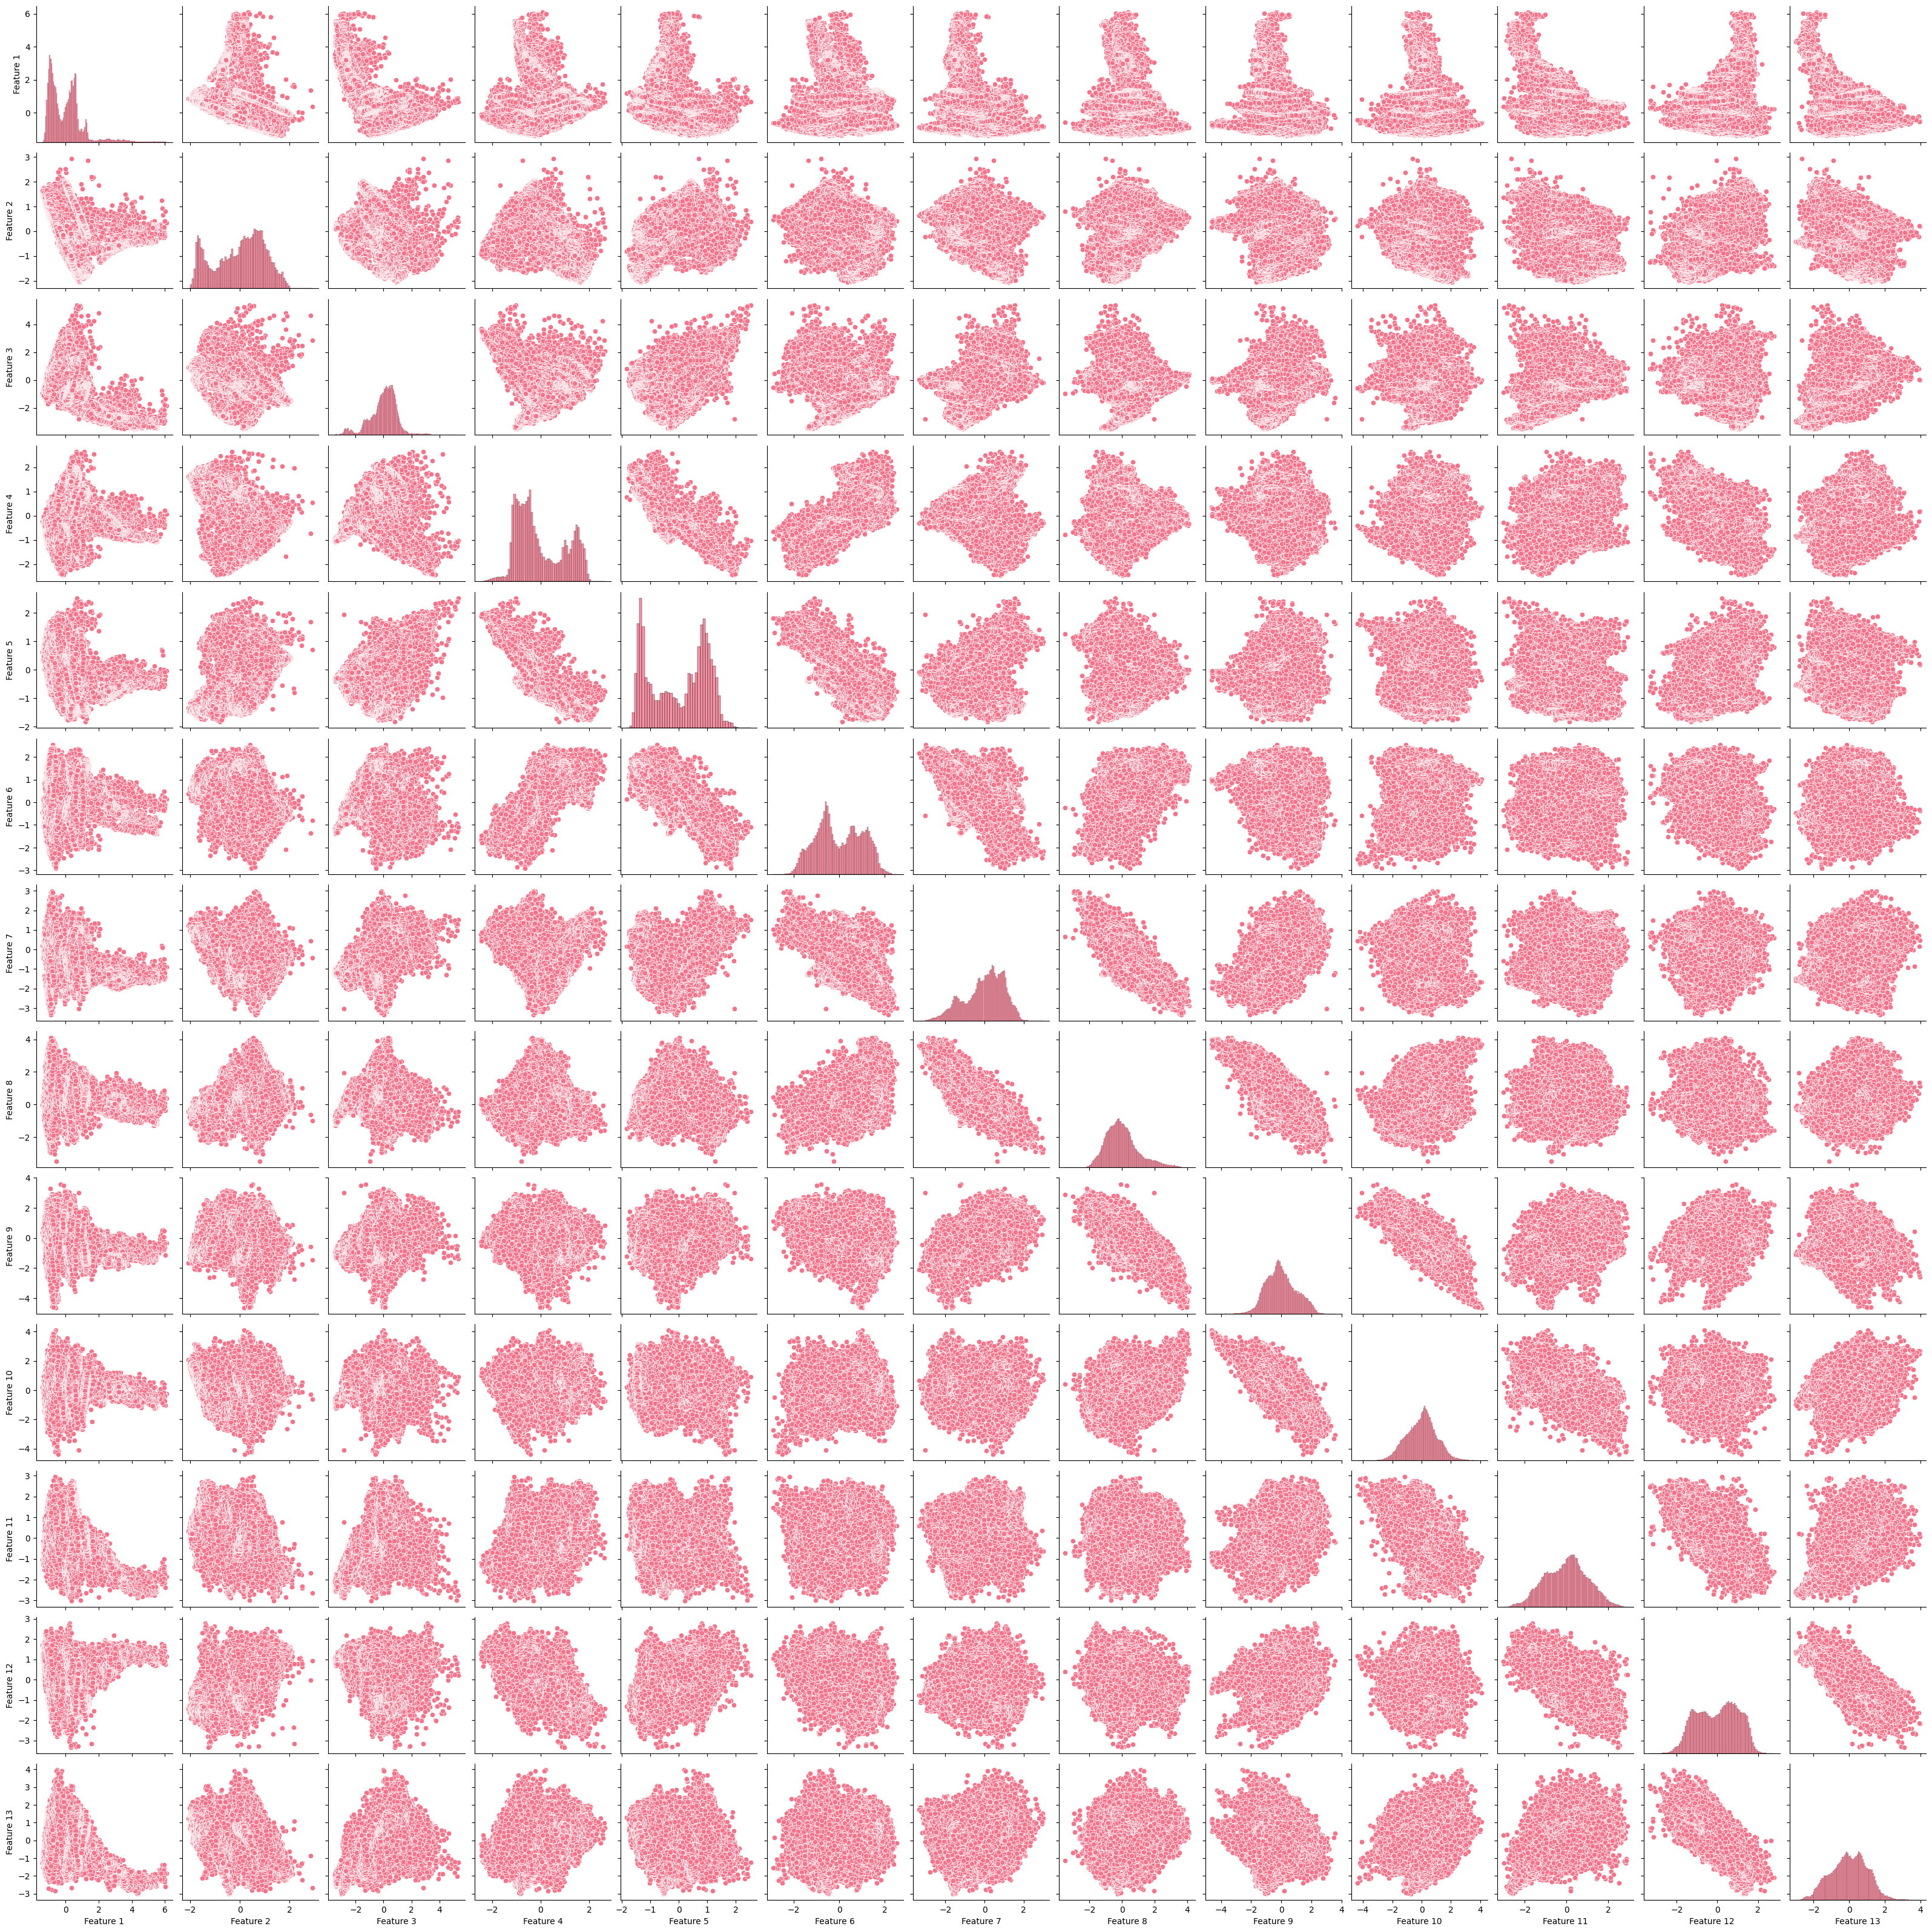

In [4]:
feature_df = pd.DataFrame(features_scaled, columns=[f"Feature {i+1}" for i in range(features_scaled.shape[1])])
# Plot pairplot in light purple theme
plt.figure(figsize=(15, 15))
sns.set_palette("husl")
sns.pairplot(feature_df.iloc[:, :13], )  # Adjust range to limit number of features
plt.show()

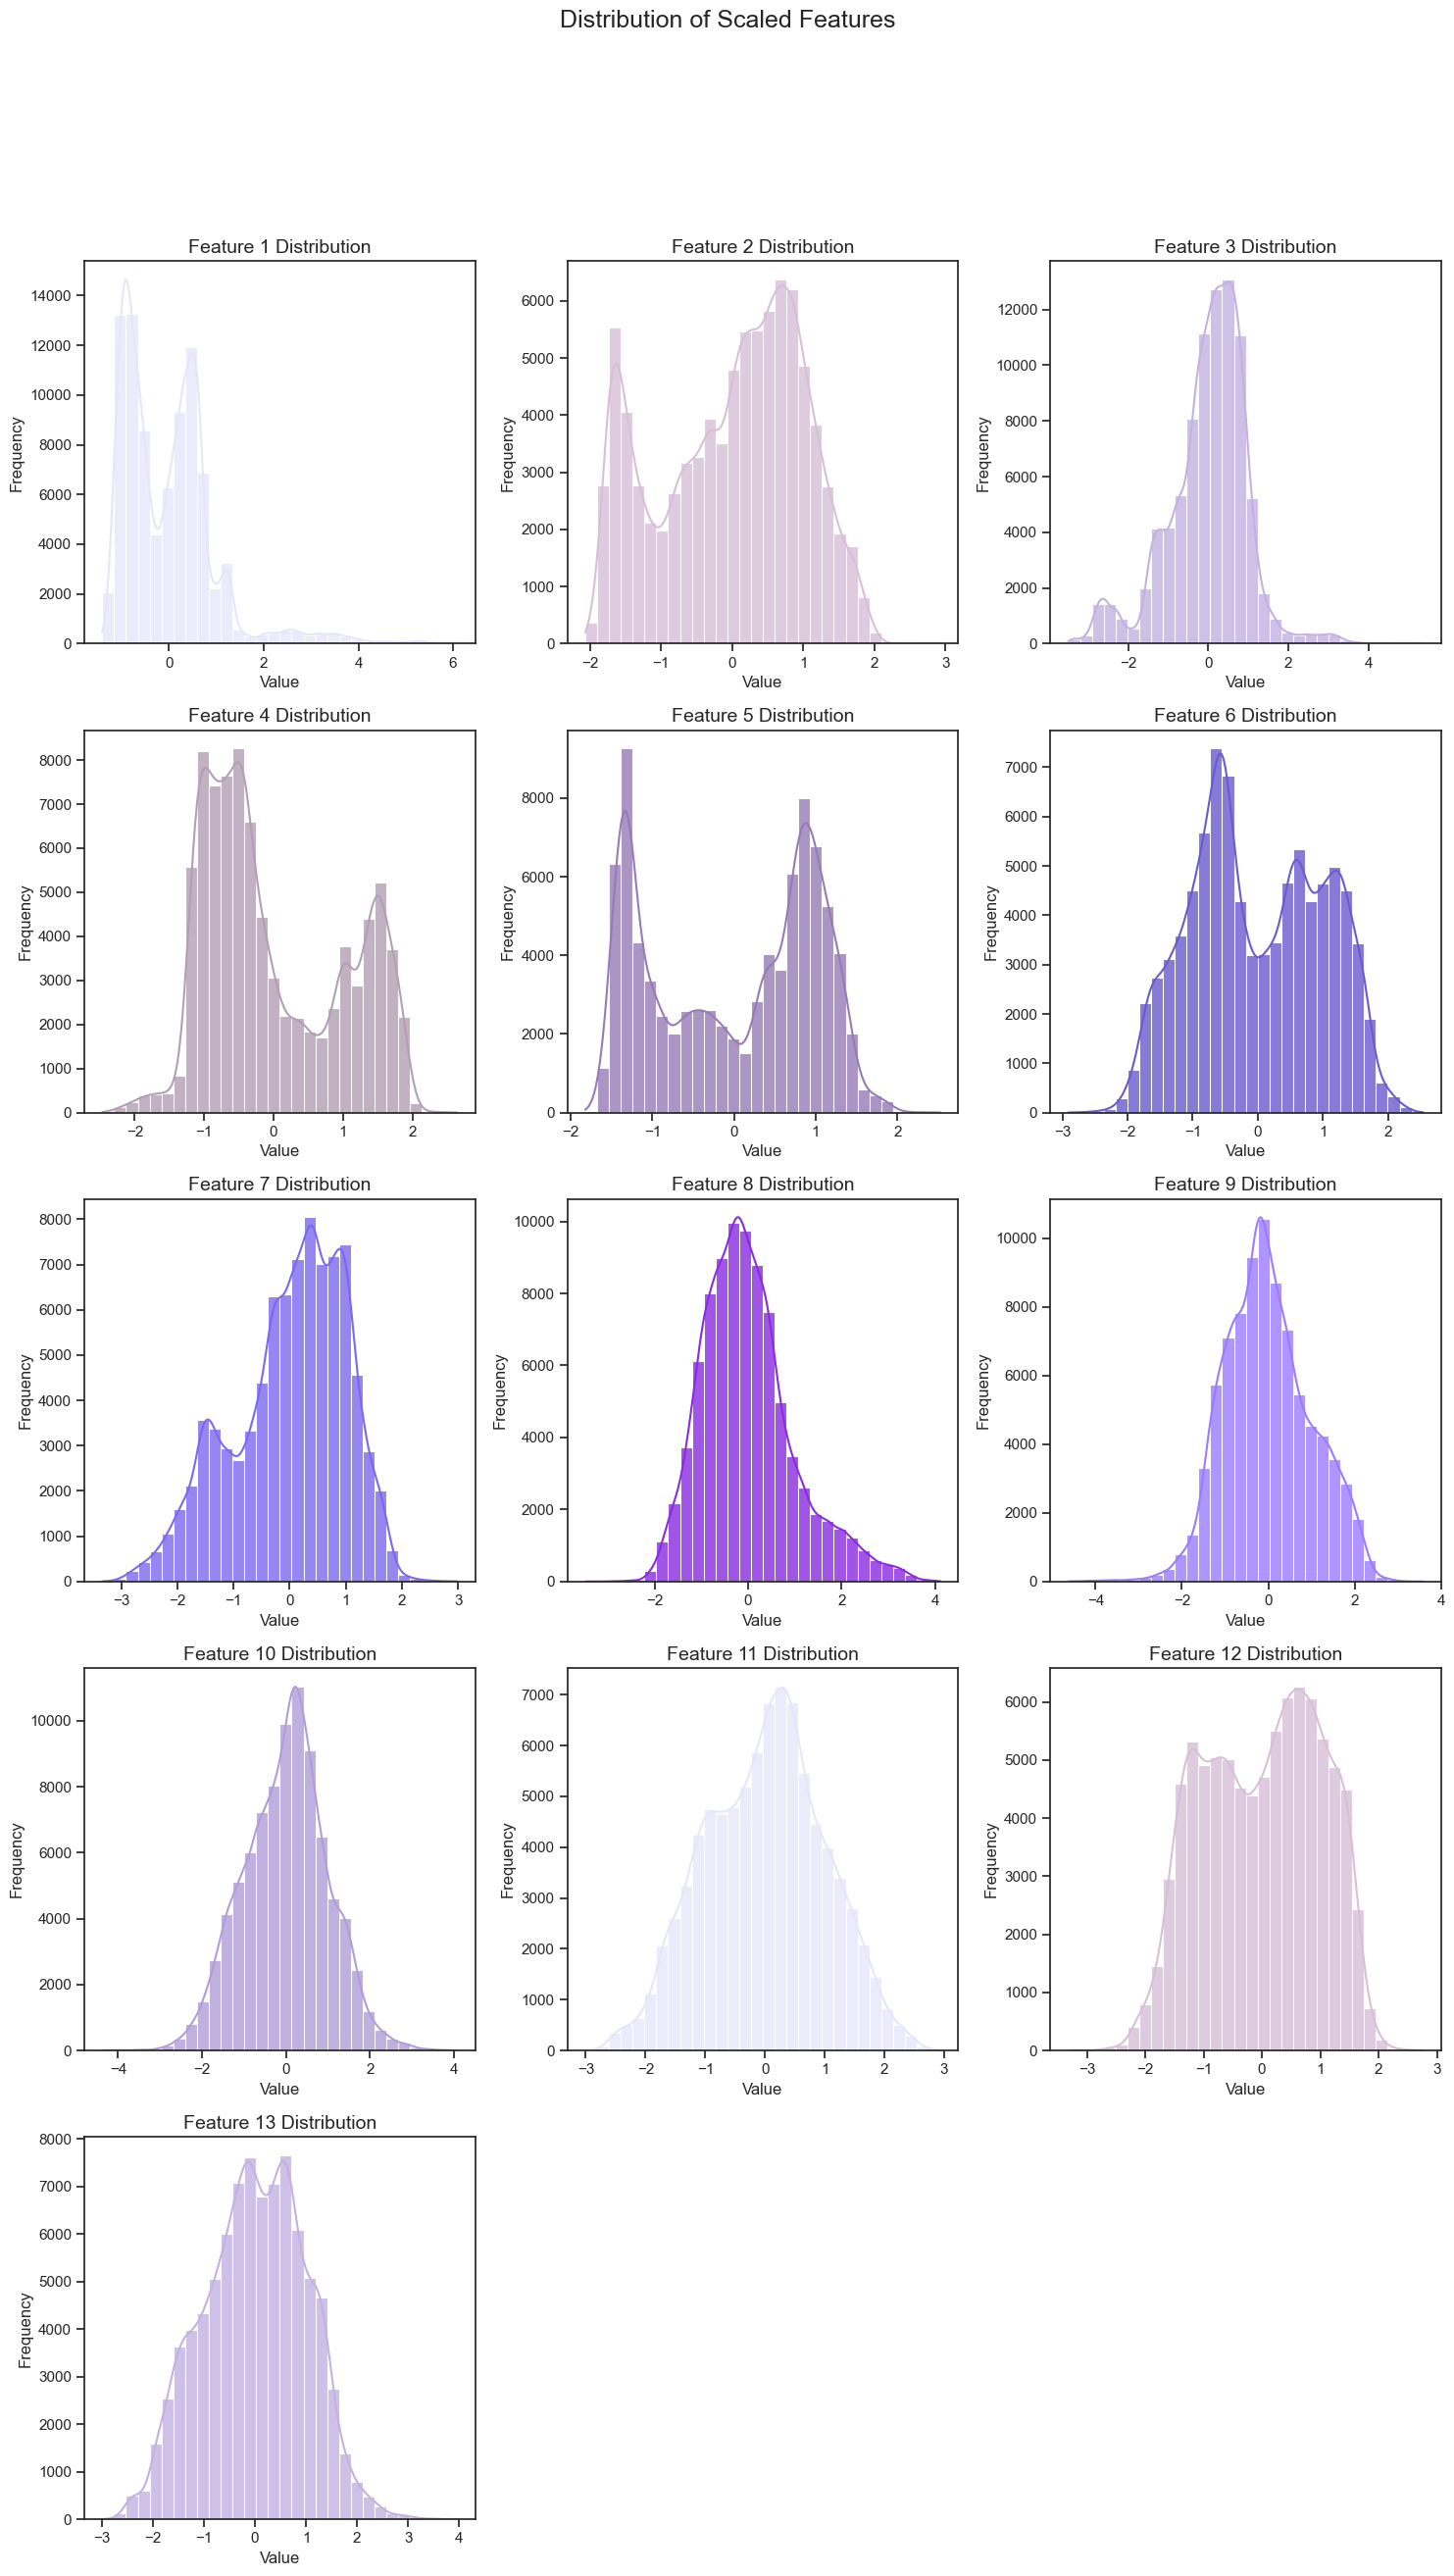

In [5]:

# Set Seaborn style and use "ticks" for cleaner gridlines
sns.set(style="ticks")

# Define a lavender-inspired discrete color palette (one per feature)
lavender_palette = ['#E6E6FA', '#D8BFD8', '#C3B1E1', '#B39EB5', 
                    '#967BB6', '#6A5ACD', '#7B68EE', '#8A2BE2', 
                    '#9A7BFF', '#B19CD9']
# Extend palette if more features than colors
while len(lavender_palette) < features_scaled.shape[1]:
    lavender_palette = lavender_palette * 2

# Calculate the number of rows and columns needed for the subplots
num_features = features_scaled.shape[1]
num_cols = 3  # Define the number of columns in the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Rows needed

# Create figure and subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Overall title with some spacing to subplots
plt.suptitle("Distribution of Scaled Features", fontsize=18, y=1.05)

# Flatten axes for easy iteration
axes = axes.flatten()

# Create histograms for each feature
for i in range(num_features):
    sns.histplot(features_scaled[:, i], bins=30, kde=True, 
                 color=lavender_palette[i], alpha=0.8, ax=axes[i])
    
    axes[i].set_title(f"Feature {i+1} Distribution", fontsize=14)
    axes[i].set_xlabel("Value", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Remove any unused subplot axes (if features don't fill the grid perfectly)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show final plot
plt.show()


In [ ]:
# Load kmeans from csv
df_KMeans = pd.read_csv(r'C:\Users\alina\Desktop\characterizing-soundscapes\cluster_basic\kmeans_labels.csv')
kmeans_labels = df_KMeans['kmeans_label'].values

# Compute centroids for  clustering algorithm
def compute_centroids(features, labels):
    unique_labels = sorted(set(labels) - {-1})  # Exclude noise points (-1) if present
    centroids = {}
    for label in unique_labels:
        cluster_points = features[labels == label]
        centroid = cluster_points.mean(axis=0)
        centroids[label] = centroid
    return unique_labels, centroids

#Compute centroids for DBSCAN and KMeans
kmeans_unique_labels, kmeans_centroids = compute_centroids(selected_features, kmeans_labels)

# Convert centroids to arrays for plotting
dbscan_centroids_array = np.array(list(dbscan_centroids.values()))
kmeans_centroids_array = np.array(list(kmeans_centroids.values()))


# Plotting DBSCAN centroids
plt.figure(figsize=(10, 8))
plt.scatter(
    dbscan_centroids_array[:, 0],
    dbscan_centroids_array[:, 1],
    color='purple',
    label='DBSCAN Centroids',
    s=10,
    marker='o'
)

plt.scatter(
    kmeans_centroids_array[:, 0],
    kmeans_centroids_array[:, 1],
    color='black',
    label='KMeans Centroids',
    s=30,
    marker='x'
)

plt.title('Centroids for DBSCAN and KMeans Clusters')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()